# <center> Análise exploratória de dados<center>


### Neste notebook será usado uma base de dados de uma pesquisa no EUA sobre o mercado de trabalho na área de programação. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory=False)

In [3]:
print(df.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0  28.0               0.0             NaN                   NaN   
1  22.0               0.0             NaN                   NaN   
2  19.0               0.0             NaN                   NaN   
3  26.0               0.0             NaN                   NaN   
4  20.0               0.0             NaN                   NaN   

   BootcampLoanYesNo  BootcampMonthsAgo BootcampName  BootcampPostSalary  \
0                NaN                NaN          NaN                 NaN   
1                NaN                NaN          NaN                 NaN   
2                NaN                NaN          NaN                 NaN   
3                NaN                NaN          NaN                 NaN   
4                NaN                NaN          NaN                 NaN   

   BootcampRecommend  ChildrenNumber  ... ResourceSoloLearn  \
0                NaN             NaN  ...               NaN   
1             

In [4]:
print(df.describe())

                Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
count  13613.000000      15380.000000      933.000000            635.000000   
mean      29.175714          0.061964        0.689175              0.584252   
std        9.017580          0.241097        0.463080              0.493239   
min       10.000000          0.000000        0.000000              0.000000   
25%       23.000000          0.000000        0.000000              0.000000   
50%       27.000000          0.000000        1.000000              1.000000   
75%       33.000000          0.000000        1.000000              1.000000   
max       86.000000          1.000000        1.000000              1.000000   

       BootcampLoanYesNo  BootcampMonthsAgo  BootcampPostSalary  \
count         934.000000         631.000000          330.000000   
mean            0.332976           9.055468        63740.506061   
std             0.471531          12.968035        26347.200265   
min             0.00

In [5]:
# Lista todas as colunas
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

# Pergunta: Qual é a diferença de idade dos participantes da pesquisa?

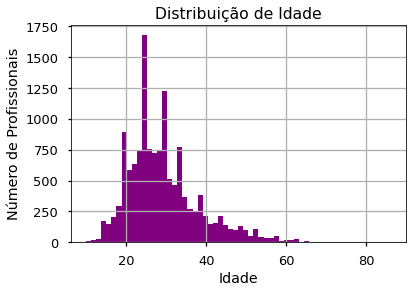

In [8]:
# Gerando um histograma
df.Age.hist(bins = 60, color="purple")
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de Idade")
plt.show()

# Resposta: A maioria dos participantes está na faixa etária de 20 a 30 anos. Sendo 25 anos a idade mais frequente. 

***

# Pergunta: Qual a distribuição de sexo dos participantes da pesquisa?

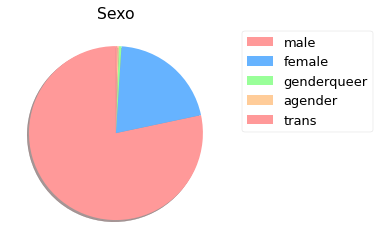

In [15]:
# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Gráfico de Pizza
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fatias, texto = plt.pie(df.Gender.value_counts(), colors = cores, startangle = 90, shadow=True)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

# Resposta: O sexo masculino foi predominante na pesquisa. 

***

# Pergunta: Quais são os principais interesses dos participantes da pesquisa?

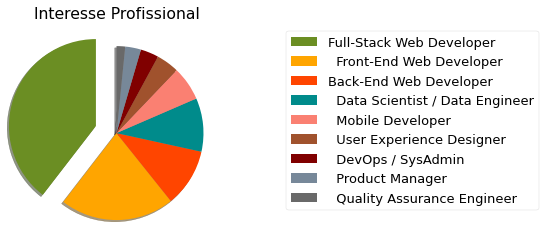

In [20]:
# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

labels = df.JobRoleInterest.value_counts().index
cores = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Gráfico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = cores, startangle = 90, shadow = True, explode = (0.25,0,0,0,0,0,0,0,0))
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()

# Resposta: O principal interesse profissional dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), seguido pela área de Data Science.

***

# Pergunta: Quais as áreas de negócio em que os participantes da pesquisa trabalham?


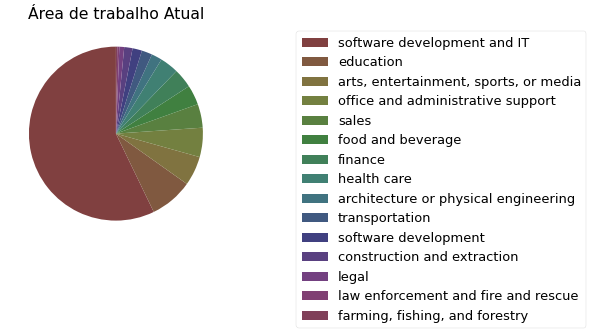

In [3]:
# Definindo a quantidade
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.EmploymentField.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title("Área de trabalho Atual")
plt.show()

# Resposta: Grande parte está na área de T.I mas esducação, arte e entretenimento também se mostra aparente. 

***

# Pergunta: Quais são a preferências de traalho por idade?

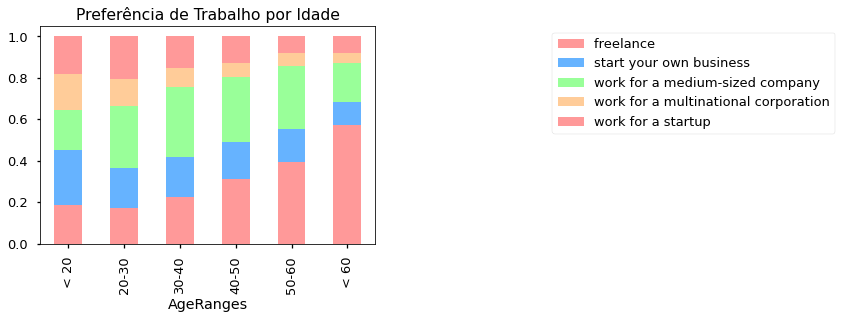

In [5]:
# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = cores, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1));

# Resposta: Fica evidente no gráfico que, quando a idade aumente, a preferencia por trabalhos freelance também aumenta. Enquanto que idades menores que 20 anos, tendem a preferir iniciar seu proprio trabalho. Além disso, idades entre 20-30 anos, 30-40 e 40-50, tendem a preferir trabalhar em empresas de médio porte.

***

# Pergunta: Qual o objetivo de realocação?

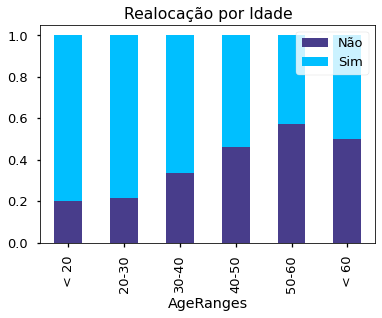

In [7]:
# Agrupando os dados
df3 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)
cores = ["#483D8B", "#00BFFF"]

# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, color = cores, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best');

# Resposta: A vontade de mudar de carreira diminui com a idade. Cerca de 80% dos participantes da pesquisa que estão abaixo dos 30 anos, estão preparados para isso. 

***

# Qual a relação entre a idade e as horas de aprendizagem?

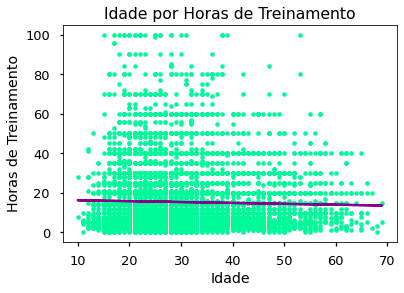

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', color="#00FA9A")
plt.plot(x, m*x + b, '-', color = "#8B008B")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

# Resposta: A idade do funcionário não interfere na quantidade de horas de treinamento e capacitação gastas pelo mesmo. O que é algo esperado, visto que a àrea de tecnologia sempre está evoluindo e os melhores profissionais do meio são aqueles mais preparados e capacitados.

***

# Pergunta: Qual a relação entre o investimento em capacitação com o valor salarial esperado? 

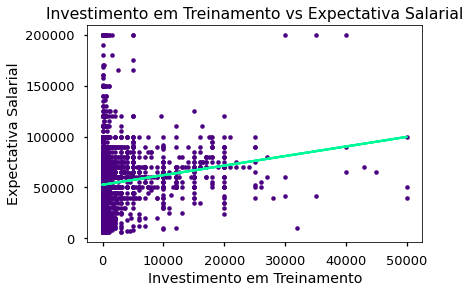

In [12]:

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df5 = df.copy()
df5 = df5.dropna(subset=["ExpectedEarning"])
df5 = df5[df['MoneyForLearning'].isin(range(0,60000))]

# Definindo os valores de x e y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.', color="#4B0082")
plt.plot(x, m*x + b, '-', color = "#00FA9A")
plt.xlabel("Investimento em Treinamento")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em Treinamento vs Expectativa Salarial")
plt.show()

# Resposta: Mesmo com outliers que esperam receber muito com 0 capacitação, os dados, em regra, está dentro do esperado que é: Quanto maior o investimento em capacitação maior a espectativa salarial. 

***

# Fim!!


Agradecimentos ao curso de Fundamentos para analise de dados com Python da Data Science Academy. 